In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
df_data = pd.read_csv("../examples_0411/gdm_first_trimester_ml_dataset.csv")
df_data = df_data.dropna()
df_data.shape

(869, 20)

In [5]:
df_data.dtypes

age_years                  float64
bmi_prepreg_kg_m2          float64
systolic_bp_mmHg           float64
diastolic_bp_mmHg          float64
map_mmHg                   float64
gestational_weeks          float64
fpg_mmol_l                 float64
hba1c_percent              float64
insulin_uIU_ml             float64
homa_ir                    float64
triglycerides_mmol_l       float64
hdl_mmol_l                 float64
parity                       int64
family_history_t2d           int64
previous_gdm                 int64
pcos                         int64
smoking_first_trimester      int64
physical_activity_level    float64
diet_score_0_100           float64
label_gdm                    int64
dtype: object

In [6]:
df_data = df_data.drop(columns=["parity",
"family_history_t2d",
"previous_gdm",
"pcos",
"smoking_first_trimester",
"physical_activity_level"])

In [7]:
df_data["label_gdm"].value_counts()

label_gdm
0    726
1    143
Name: count, dtype: int64

In [8]:
df_data.head()

,age_years,bmi_prepreg_kg_m2,systolic_bp_mmHg,diastolic_bp_mmHg,map_mmHg,gestational_weeks,fpg_mmol_l,hba1c_percent,insulin_uIU_ml,homa_ir,triglycerides_mmol_l,hdl_mmol_l,diet_score_0_100,label_gdm
0,26.8,26.9,119.0,57.0,77.7,8.7,4.10,5.33,7.8,1.42,1.37,1.36,62.0,0
3,26.3,23.6,112.0,69.0,83.3,12.2,4.79,4.69,13.7,2.91,1.22,1.73,81.0,0
5,28.1,22.2,120.0,76.0,90.3,12.8,4.14,4.89,11.6,2.13,1.19,1.62,83.0,0
6,29.0,23.8,119.0,74.0,89.2,11.2,4.54,4.63,10.6,2.13,1.62,1.88,46.0,0
8,29.5,24.3,105.0,80.0,88.2,12.3,4.54,5.38,8.2,1.66,2.44,1.56,74.0,0


In [10]:
y = df_data["label_gdm"].values
df_values = df_data.drop(columns=["label_gdm"])

In [19]:
df_values.columns

Index(['age_years', 'bmi_prepreg_kg_m2', 'systolic_bp_mmHg',
       'diastolic_bp_mmHg', 'map_mmHg', 'gestational_weeks', 'fpg_mmol_l',
       'hba1c_percent', 'insulin_uIU_ml', 'homa_ir', 'triglycerides_mmol_l',
       'hdl_mmol_l', 'diet_score_0_100'],
      dtype='object')

In [ ]:
pca_instance = PCA(random_state=42)
pca_instance.fit(df_values.values)
pca_instance.explained_variance_ratio_

array([3.68303400e-01, 2.98981675e-01, 1.78217997e-01, 5.50268462e-02,
       4.92382308e-02, 4.08970020e-02, 5.14300132e-03, 2.75329239e-03,
       6.94352437e-04, 2.94257248e-04, 2.18905933e-04, 1.73189469e-04,
       5.78504646e-05])

In [17]:
np.sum(pca_instance.explained_variance_ratio_)

np.float64(1.0)

In [18]:
df_pca_values = pd.DataFrame()
df_pca_values["explained_ratio"] = pca_instance.explained_variance_ratio_
df_pca_values

,explained_ratio
0,0.368303
1,0.298982
2,0.178218
3,0.055027
4,0.049238
5,0.040897
6,0.005143
7,0.002753
8,0.000694
9,0.000294


In [21]:
df_pca_raw = pd.DataFrame(pca_instance.transform(df_values.values), columns=[f"p_{i}" for i in range(pca_instance.n_components_)])
df_pca_raw

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12
0,-2.420167,-3.428214,-16.269266,0.067879,-1.625262,3.585318,-2.153875,-0.212263,0.068330,-0.490606,-0.092779,0.026768,0.011098
1,1.466655,16.053571,-2.452533,2.078250,-2.341974,-2.980428,1.360966,-0.471965,-0.384403,0.318158,0.426682,-0.216886,-0.029409
2,13.451470,16.683652,1.225886,-2.155631,-2.242529,-2.111462,1.866905,-0.988164,-0.301525,-0.094779,0.318925,-0.078432,-0.292061
3,6.444024,-19.720714,2.072607,-2.115396,-1.293381,-0.257408,0.293567,-0.617589,0.093147,0.279663,0.561082,-0.125610,0.167782
4,0.261559,10.050754,11.847430,-2.860556,-1.121177,1.140899,1.378024,0.380517,0.849876,-0.093264,-0.021162,0.173198,-0.088047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,-1.425000,-1.684361,-0.275417,5.881232,9.030215,5.559518,2.651352,-1.449232,-0.064848,0.258616,0.386591,-0.392967,0.305113
865,43.250768,-14.679050,-10.760733,33.679616,1.089471,-3.653975,2.273677,8.032609,0.158315,-1.457928,0.963347,-0.079503,0.000711
866,-26.864489,-5.296202,-19.192746,2.515148,-4.844871,3.116927,-2.461205,0.492295,0.290924,-0.198686,0.482973,-0.048611,-0.009631
867,-4.959296,-6.297240,-2.223637,0.876780,-1.239756,0.054653,-2.425203,-0.036903,0.662720,-0.080574,-0.235360,0.124159,0.138333


In [22]:
import seaborn as sns

<Axes: >

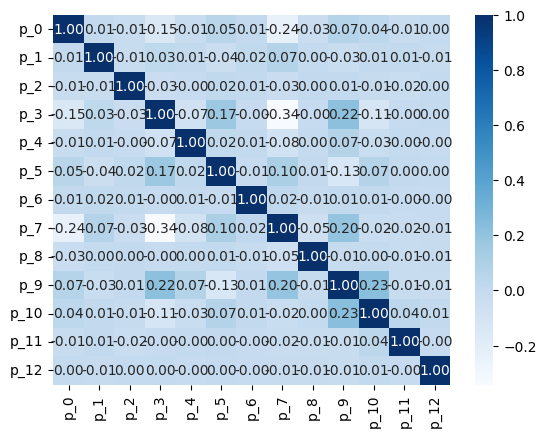

In [27]:
sns.heatmap(data=df_pca_raw.corr(method="spearman"), cmap="Blues", annot=True, fmt=".2f")

In [28]:
scaler = StandardScaler()
scaler.fit(df_values.values)
data_scaled = scaler.transform(df_values.values)

In [29]:
pca_instance_with_scaler = PCA(random_state=42)
pca_instance_with_scaler.fit(data_scaled)

df_pca_values_with_scaler = pd.DataFrame()
df_pca_values_with_scaler["explained_ratio"] = pca_instance_with_scaler.explained_variance_ratio_
df_pca_values_with_scaler

,explained_ratio
0,0.267928
1,0.130990
2,0.081255
3,0.078101
4,0.076652
5,0.073227
6,0.072771
7,0.066931
8,0.061814
9,0.050377


In [30]:
df_pca_raw_scaler = pd.DataFrame(pca_instance_with_scaler.transform(data_scaled), columns=[f"p_{i}" for i in range(pca_instance_with_scaler.n_components_)])
df_pca_raw_scaler

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12
0,-1.204098,-1.007286,0.000236,-0.694732,-0.371246,-0.347409,-1.147171,1.345662,0.772004,-0.157431,-0.618910,0.160223,0.001403
1,-0.539788,0.181199,-1.462603,-0.240414,0.782276,-0.306210,0.859385,-0.068849,-1.173631,-0.523267,0.700521,0.012655,-0.003572
2,-0.293241,1.730062,-1.113673,0.246398,0.995807,-0.544515,0.655963,0.097504,-1.145079,-0.262282,-0.021176,0.117702,-0.036237
3,-0.499847,1.206186,-0.201390,-0.266751,-1.964786,0.264067,1.021045,-0.163449,-0.240221,-0.489923,0.422126,0.081627,0.020540
4,0.185853,1.083374,0.091878,0.736402,1.090412,0.094224,0.894709,-0.993005,1.003893,0.251741,-0.294210,0.047508,-0.011145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,-0.505650,0.135663,-0.282038,0.704141,0.087324,2.607249,1.130907,0.744933,-1.164105,-1.243108,0.285364,-0.014393,0.037992
865,14.845408,-4.590356,-2.831041,1.013426,-0.650055,0.955505,0.201843,1.142357,0.787032,0.205059,1.290287,1.224764,0.000040
866,-3.216559,-2.827193,-0.727275,-1.312996,-0.897651,-0.141071,-0.231456,0.535575,1.144169,-0.399471,0.259997,0.294465,-0.001208
867,0.042320,-0.841778,0.612819,-0.880316,-0.450279,-0.345369,-0.420422,-0.153718,1.241073,-0.167907,-0.584879,-0.064596,0.017019


<Axes: >

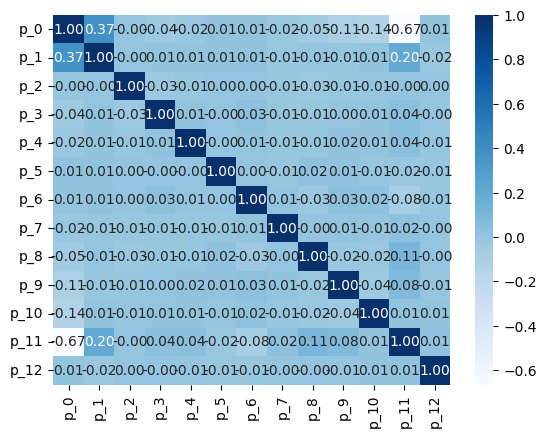

In [31]:
sns.heatmap(data=df_pca_raw_scaler.corr(method="spearman"), cmap="Blues", annot=True, fmt=".2f")

- procesar dataset
- Dividimos en training/validation o training/validation/testing
- escalar/estandarizar --> utilizando la informacion del training
- PCA --> Training
- Entrenamos modelo
- Ajuste de hiperparámetros
- Testeamos/evaluamos métricas

In [32]:
import matplotlib.pyplot as plt

In [33]:
df_pca_raw_scaler["label"] = y
df_pca_raw["label"] = y

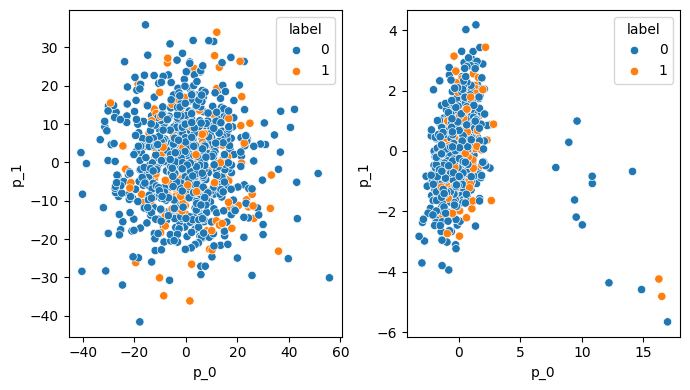

In [34]:
_, axis = plt.subplots(1,2, figsize=(7, 4))

sns.scatterplot(data=df_pca_raw, x="p_0", y="p_1", hue="label", ax=axis[0])
sns.scatterplot(data=df_pca_raw_scaler, x="p_0", y="p_1", hue="label", ax=axis[1])

plt.tight_layout()

In [43]:
tsne_instance = TSNE(random_state=42, n_components=3)
tsne_data_projection = tsne_instance.fit_transform(data_scaled)
df_tsne = pd.DataFrame(data=tsne_data_projection, columns=["p_0", "p_1", "p_2"])

In [44]:
tsne_instance.embedding_

array([[-10.27465   , -20.27357   ,   6.0610256 ],
       [ -3.845977  ,  11.786924  , -29.261286  ],
       [ -0.77146864,  15.277841  , -29.284924  ],
       ...,
       [-30.624758  , -13.520313  ,   5.8806667 ],
       [-10.26746   , -15.829411  ,  -0.5522281 ],
       [ 21.498346  ,  10.630087  ,  19.720032  ]],
      shape=(869, 3), dtype=float32)

In [45]:
df_tsne["label"] = y

<Axes: xlabel='p_0', ylabel='p_1'>

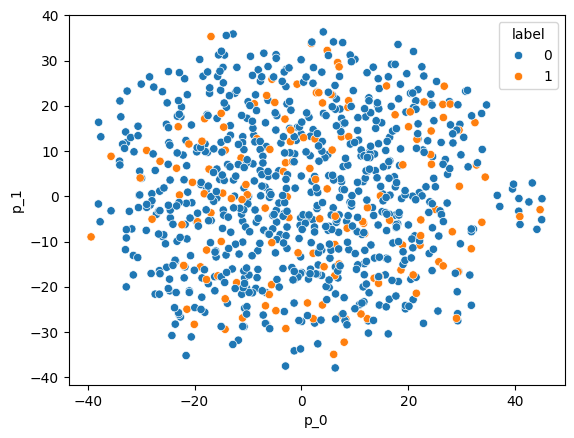

In [46]:
sns.scatterplot(data=df_tsne, x="p_0", y="p_1", hue="label")

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
enc = OneHotEncoder()

In [49]:
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])  


,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [51]:
enc.categories_

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3])]

In [53]:
enc.transform([[1, 1, 1]]).toarray()


array([[0., 1., 0., 1., 0., 0., 1., 0., 0.]])